In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime

In [2]:
stat_df = pd.read_csv('data/statipy_results.csv')

## statidate_i 

###### drops unnamed axis

In [3]:
statidate_i = stat_df.drop('Unnamed: 0', axis=1)

###### changes Rdate to datetime index

In [4]:
statidate_i['Rdate']= pd.DatetimeIndex(statidate_i['Rdate'], freq='infer')

###### rdate index + artsongcnt + songfreq

In [5]:
statidate_i['artsongcnt'] = statidate_i.groupby('Artist')['Track'].transform('count')

In [6]:
statidate_i['songfreq'] = statidate_i.groupby('Track')['Track'].transform('count')

In [7]:
statidate_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 8 columns):
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null datetime64[ns]
artsongcnt     991 non-null int64
songfreq       991 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(3), object(3)
memory usage: 55.2+ KB


*********************************************

## stat_allfreq
### rdate index + artsongcnt + songfreq + datesongcnt

In [8]:
stat_allfreq = statidate_i.copy()

In [9]:
stat_allfreq['datesongcnt'] = stat_allfreq.groupby('Rdate')['Track'].transform('count')

In [10]:
stat_allfreq.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datesongcnt
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1,2
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1,1


************************************

## statipy_yr
### rdate YEAR + songfreq + artsongcnt + yrsongcnt

In [11]:
statipy_yr = statidate_i.copy()

In [12]:
statipy_yr['Rdate'] = pd.DatetimeIndex(statipy_yr['Rdate']).year

In [13]:
statipy_yr['yrsongcnt'] = statipy_yr.groupby('Rdate')['Track'].transform('count')

In [14]:
statipy_yr.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,yrsongcnt
0,Paradise,False,49,Voyage,Paradise,2018,1,1,118
1,Tech Noir,False,56,Gunship,GUNSHIP,2015,1,1,61
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015,1,1,61
3,Night,False,39,John Carpenter,Lost Themes,2015,1,1,61
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017,1,1,142


******************************************
******************************************

## START: Clean data - 
    ### stat_allfreq = rdate index + artsongcnt + songfreq + datesongcnt
    ### statipy_yr = rdate year + artsongcnt + songfreq + yrsongcnt

# 1.  DATE
**********************************

## GROUP A - yearly
#### Rdate Year full statistics

In [15]:
yearly = statipy_yr.groupby(['Rdate']).mean()
yearly.head()

,Explicit,Tpopularity,artsongcnt,songfreq,yrsongcnt
Rdate,,,,,
1933,0.0,42.666667,7.0,1.0,3.0
1937,0.0,55.000000,1.0,1.0,1.0
1941,0.0,44.000000,4.0,1.0,1.0
1955,0.0,48.000000,4.0,1.0,1.0
1956,0.0,43.800000,6.2,1.0,10.0


## GROUP B - tr3y, tr2y tr1y
#### Rdate Year most repeat tracks (song freq)

In [16]:
tr3y = statipy_yr[statipy_yr['songfreq']>=3]
tr2y = statipy_yr[statipy_yr['songfreq']==2]
tr1y = statipy_yr[statipy_yr['songfreq']<=1]

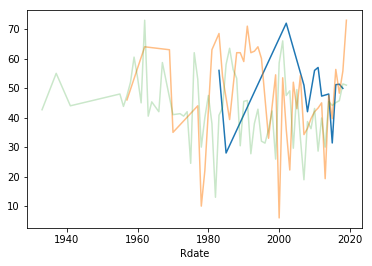

In [17]:
tr3y.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=1)
tr2y.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.50)
tr1y.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.25)

## GROUP C
#### Rdate Year most tracks per year
#### date_i = year-date (most freq - yrsongcnt) / date_max = year-date (top >=15 only - yrsongcnt)

In [18]:
freqdates = statipy_yr[statipy_yr['yrsongcnt']>=8]
maxfreqdates = statipy_yr[statipy_yr['yrsongcnt']>=15]
minfreqdates = statipy_yr[statipy_yr['yrsongcnt']==1]

In [19]:
date_i = freqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'yrsongcnt']].mean()

In [20]:
date_max = maxfreqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'yrsongcnt']].mean()

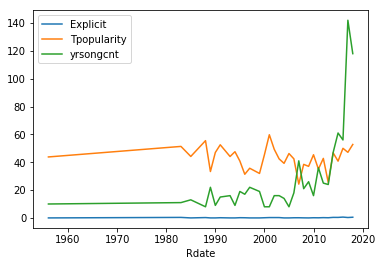

In [21]:
date_i.plot()

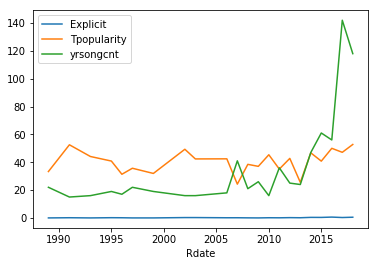

In [22]:
date_max.plot()

## GROUP D
#### Rdate Year stats:: explicit avg x pop avg x yrsongcnt per YR

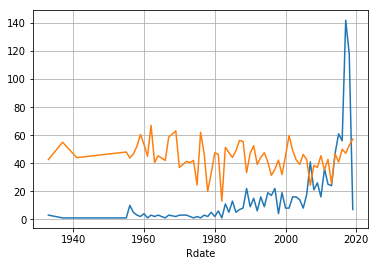

In [23]:
statipy_yr.groupby('Rdate')['yrsongcnt'].mean().plot.line(stacked=True, grid=True)
statipy_yr.groupby('Rdate')['Tpopularity'].mean().plot.line(stacked=True, grid=True)

#####  explicit avg only / year

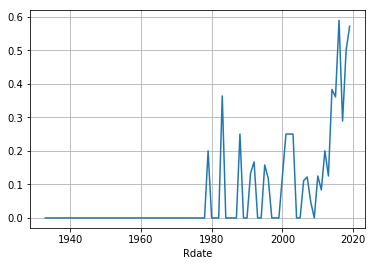

In [24]:
statipy_yr.groupby('Rdate')['Explicit'].mean().plot.line(stacked=True, grid=True)

## GROUP E
#### Rdate Year X yrsongcount 1 (mindate)

In [31]:
#dates with least tracks per YEAR
mindate = stat_allfreq[stat_allfreq['datesongcnt']==1]
mindate.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datesongcnt
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1,1
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1,1
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017-02-02,5,1,1
8,Pose,False,55,Naomi Smalls,Pose,2018-12-27,1,1,1


#### Rdate Yr plots albums by date by track popularity over explicit content.

In [39]:
statipy_yr['Tpopularity'].mean()

43.71241170534813

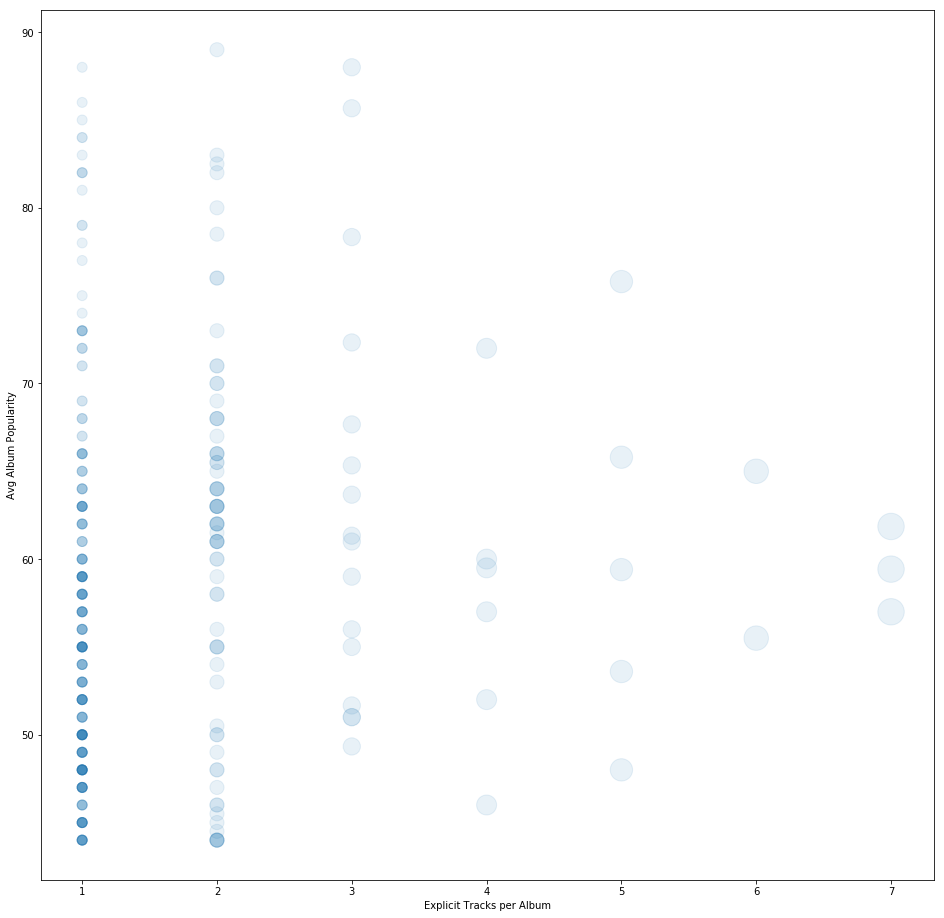

In [40]:
popular_tracks= statipy_yr[statipy_yr['Tpopularity']>=43.71]
x = popular_tracks.groupby(['Album'])['Tpopularity'].mean()
y = popular_tracks.groupby(['Album'])['Explicit'].count()
s = popular_tracks.groupby(['Album'])['Track'].count()

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(y, x, s*100, alpha=0.10);
ax.set_ylabel('Avg Album Popularity')
ax.set_xlabel('Explicit Tracks per Album')

plt.show()

#### Rdate by track popularity over explicit content. with number of tracks to size

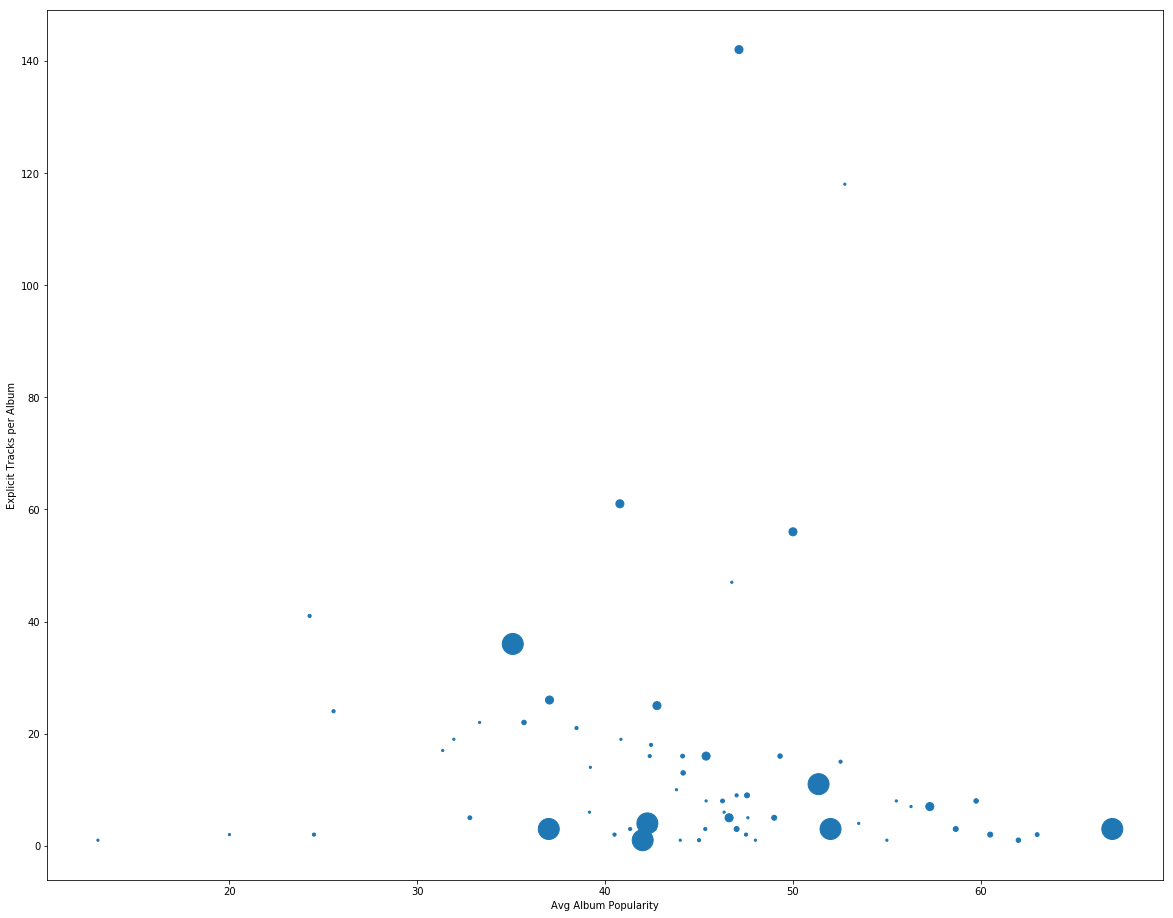

In [41]:
x = statipy_yr.groupby(['Rdate'])['Tpopularity'].mean()
y = statipy_yr.groupby(['Rdate'])[['Explicit']].count()

fig, ax = plt.subplots(figsize=(20, 16))
ax.scatter(x=x, y=y, s=statipy_yr['artsongcnt']*5);
ax.set_xlabel('Avg Album Popularity')
ax.set_ylabel('Explicit Tracks per Album')

plt.show()

# 2. ARTISTS
************************************

## GROUP A - artstatsy
#### artists full statistics per clean data 
top - Tpopularity, Explicit, Songfreq

In [43]:
art_statsy = statipy_yr.groupby(['Artist', 'Rdate']).mean()
art_statsy

,,Explicit,Tpopularity,artsongcnt,songfreq,yrsongcnt
Artist,Rdate,,,,,
!!!,2017,0.0,38.000000,2.0,2.000000,142.0
2Pac,2014,1.0,43.000000,1.0,1.000000,47.0
Aaron Copland,1960,0.0,50.000000,1.0,1.000000,4.0
Adam Joseph,2017,0.0,40.000000,1.0,1.000000,142.0
Adore Delano,2014,1.0,49.000000,1.0,1.000000,47.0
Adrianne Lenker,2018,0.0,58.000000,1.0,1.000000,118.0
Agnes Obel,2013,0.0,53.000000,1.0,1.000000,24.0
Ah-Mer-Ah-Su,2017,0.0,5.000000,2.0,2.000000,142.0
Aja,2017,0.5,48.000000,5.0,1.000000,142.0


# 3. SONGFREQ (#of times song is featured in playlist)
*****************************

## GROUP A
### Divide by song frequency
#### Song Freq = NO_SOLO + SOLO_DF

In [ ]:
#no_solo = statipycounts_df[statipycounts_df['songfreq']>=2]
#no_solo.info()

In [ ]:
#solo_df = statipycounts_df[statipycounts_df['songfreq']<=1]
#solo_df.info()

## GROUP B
### song frequency X artist tracks (artsongcnt)
#### artist with most non repeat tracks || artist_mostsolo

In [ ]:
#artist_mostsolo = solo_df[solo_df['artsongcnt']>=5]
#artist_mostsolo

###### plot : artist_mostsolo / artsongcnt XX popularity / dates (year)

In [ ]:
#artist_mostsolo.groupby(['Rdate'])['artsongcnt'].mean().plot()
#artist_mostsolo.groupby(['Rdate'])['Tpopularity'].mean().plot()

## GROUP Bb
### artists most solo / explicit tracks
#### pg13artists_ms || artsongcnt_ms

In [ ]:
#pg13artists_ms = artist_mostsolo[artist_mostsolo['Explicit']==1.0]
#xartists_ms = artist_mostsolo[artist_mostsolo['Explicit']==0.0]

###### plot :: Tpopularity XX artsongcnt XX Explicit ?? (level of 0 - 2)

In [ ]:
#pg13artists_ms[['Tpopularity', 'Explicit', 'artsongcnt']].plot.line()
#xartists_ms[['Tpopularity', 'Explicit', 'artsongcnt']].plot.line()

## GROUP C
### SOLO_DF >43 POP only  |  popsolo
###### plot per release date - artists track count // avg track popularity

In [ ]:
#popart_ms = artist_mostsolo[artist_mostsolo['Tpopularity']<=43.17]
#popart_ms.groupby('Rdate')['artsongcnt'].mean().plot(stacked=True)
#popart_ms.groupby('Rdate')['Tpopularity'].mean().plot(grid=True)

##### per release date - artists track count // avg track popularity
###### plot (unfilled stack step)

In [ ]:
#ibins = 30
#x = popart_ms.Tpopularity
#x1 = popart_ms.artsongcnt
#colors = ['blue', 'orange', 'green']
#plt.hist(x1, ibins, histtype='step', stacked=True, fill=False, label=colors)
#plt.hist(x, ibins, histtype='step', stacked=True, fill=False, label=colors)
#plt.legend(loc="upper right")
#plt.title('Stack Step (unfilled)')
#plt.show()

## GROUP Cc
### Most popular Artist w/ most solos (non repeat tracks)
##### high pop && freq  ----  highrank_artistsolo

In [ ]:
#popular_solo = solo_df[solo_df['Tpopularity']>=43]
#freq_popularsolo = popular_solo[popular_solo['artsongcnt']>=8]
#highrank_artistsolo = freq_popularsolo.groupby(['Artist'])[['Artist', 'Tpopularity',
#'artsongcnt']].mean()

In [ ]:
#plot
#highrank_artistsolo.plot.bar()

## GROUP Ccc
### ARTIST : HIGH POP, HIGH SONG REPEAT
#### high pop && freq   ----   mostfreq_pop

In [ ]:
#mostfreq_pop = no_solo[no_solo['songfreq']>3]
#mostfreq_pop.groupby('Artist').mean().plot.bar()

## GROUP D
##### ALL TRACKS POP x EXPLICIT / YEAR dates
##### RECALL STATIPY_DF ( + track columns)¶
scatter - popularity / explicit count *** s=statipy_df['artsongcnt']*5*

plot

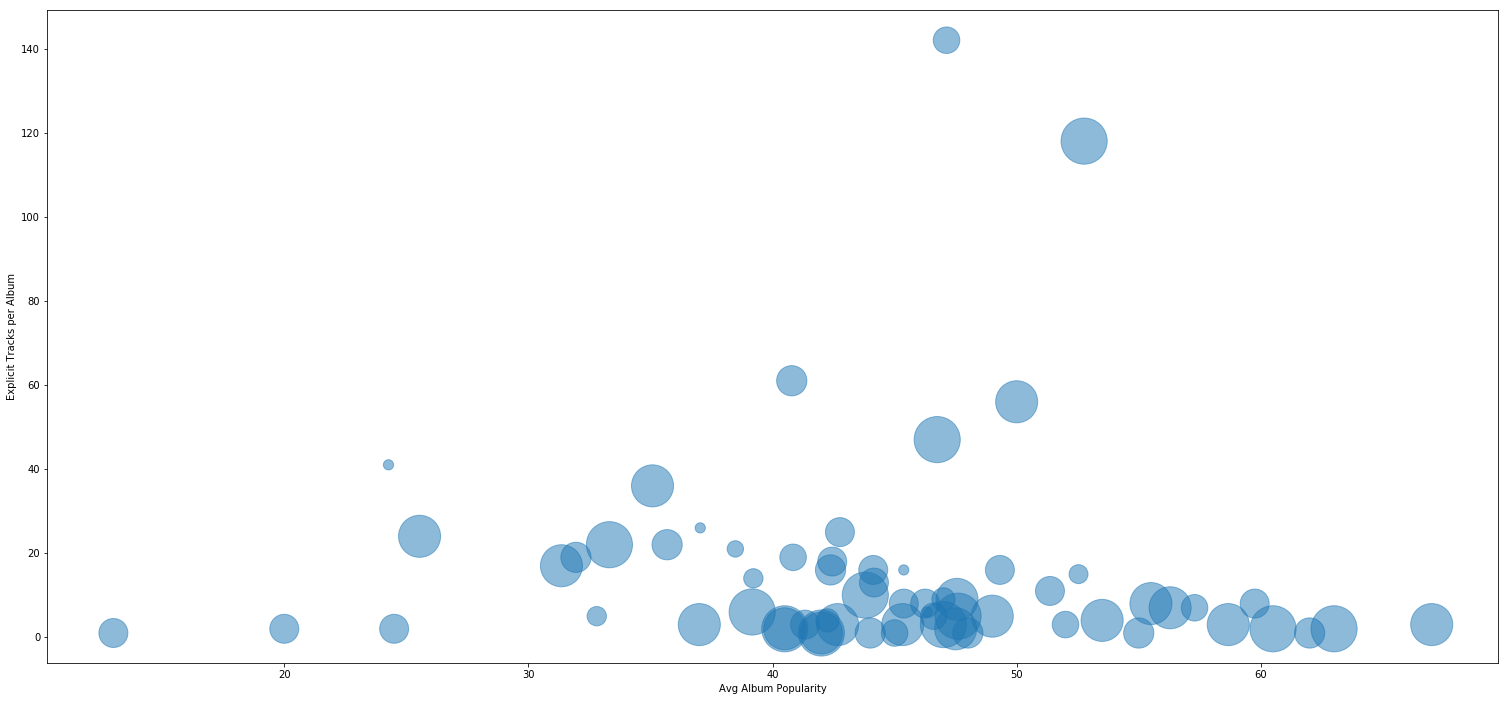

In [50]:
x = statipy_yr.groupby(['Rdate'])['Tpopularity'].mean()
y = statipy_yr.groupby(['Rdate'])[['Explicit']].count()

fig, ax = plt.subplots(figsize=(26, 12))
ax.scatter(x=x, y=y, s=statipy_yr['yrsongcnt']*15, alpha=0.50);

ax.set_xlabel('Avg Album Popularity')
ax.set_ylabel('Explicit Tracks per Album')

plt.show()

# 4. POPULARITY
*****************************

## GROUP A 
#### statipy_yr high pop >43  = popular_tracks
##### scatter plot s = * track count

In [52]:
popular_tracks= statipy_yr[statipy_yr['Tpopularity']>=43.71]

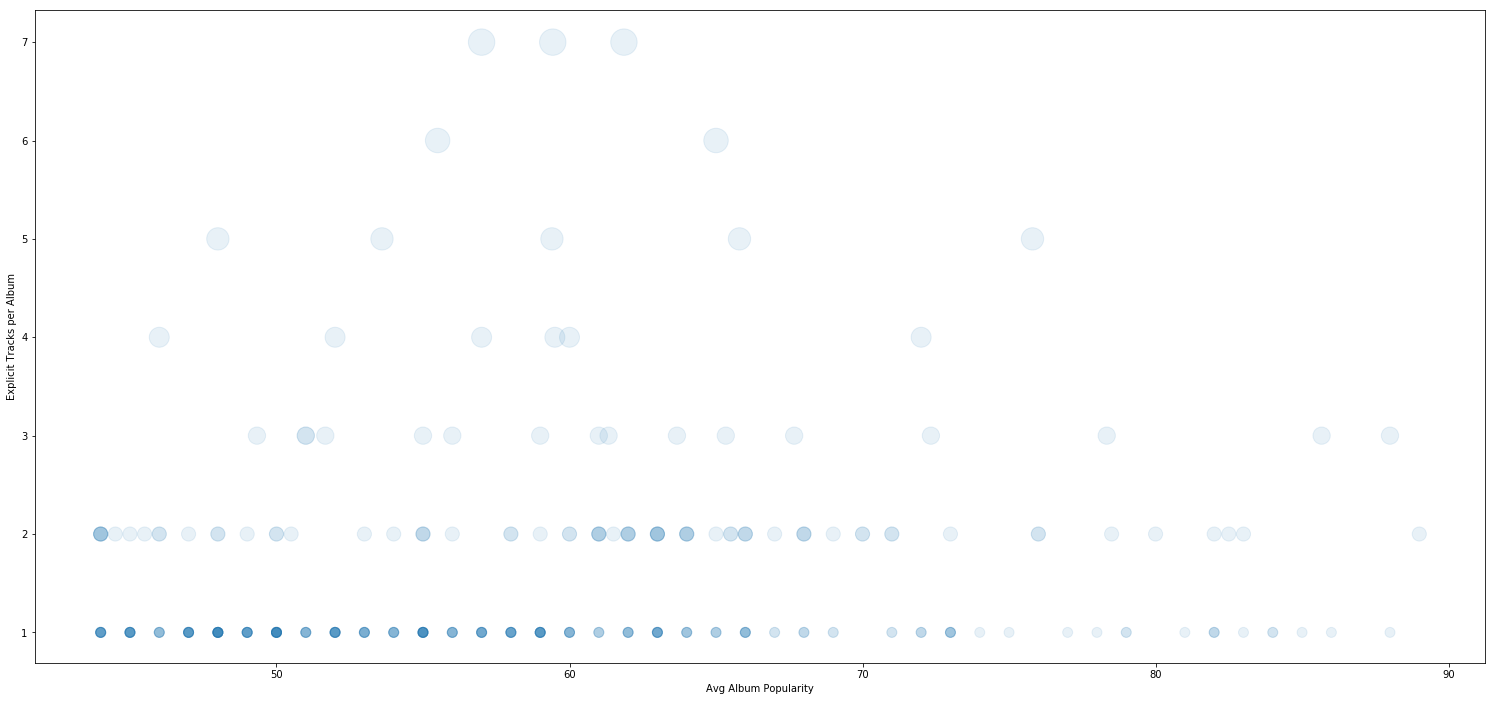

In [53]:
#### scatterplot
x = popular_tracks.groupby(['Album'])['Tpopularity'].mean()
y = popular_tracks.groupby(['Album'])['Explicit'].count()
s = popular_tracks.groupby(['Album'])['Track'].count()

fig, ax = plt.subplots(figsize=(26, 12))
ax.scatter(x, y, s*100, alpha=0.10);
ax.set_xlabel('Avg Album Popularity')
ax.set_ylabel('Explicit Tracks per Album')

plt.show()

In [ ]:
## GROUP B
### MOST POP ARTIST BY YEAR GROUP
#### bar plot - most pop artists with most freq tracks XX explicit & song freq

In [54]:
most_popular_y = statipy_yr[statipy_yr['Tpopularity']>=43]
most_popular_y.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,yrsongcnt
0,Paradise,False,49,Voyage,Paradise,2018,1,1,118
1,Tech Noir,False,56,Gunship,GUNSHIP,2015,1,1,61
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014,88,2,47
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017,5,1,142
8,Pose,False,55,Naomi Smalls,Pose,2018,1,1,118


In [55]:
most_popular_y['artsongcnt'].mean()

10.678638941398866

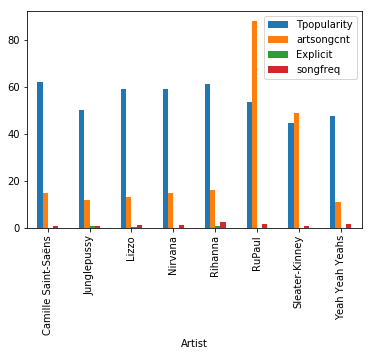

In [58]:
# plot
popart_mostfreq = most_popular_y[most_popular_y['artsongcnt']>=10.67]
popart_mostfreq.groupby('Artist')[['Tpopularity', 'artsongcnt', 'Explicit', 'songfreq']].mean().plot.bar()

# 5. EXPLICIT CONTENT
*****************************

## GROUP A
#### EXPLICIT x >5 SONG REPEATS

In [59]:
explicit_tracks = statipy_yr[statipy_yr['Explicit']==True]
freqex_tracks = explicit_tracks[explicit_tracks['songfreq']>=5]
freqex_tracks

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,yrsongcnt
487,Money,True,46,Leikeli47,Money,2016,9,5,56
491,Sex With Me,True,65,Rihanna,ANTI (Deluxe),2016,16,5,56
499,Decline Him,True,41,Quay Dash,Transphobic,2017,6,6,142
536,Money,True,58,Leikeli47,Wash & Set,2017,9,5,142
564,Decline Him,True,41,Quay Dash,Transphobic,2017,6,6,142
674,Sex With Me,True,65,Rihanna,ANTI (Deluxe),2016,16,5,56
690,Decline Him,True,41,Quay Dash,Transphobic,2017,6,6,142
702,Money,True,46,Leikeli47,Money,2016,9,5,56
732,Sex With Me,True,65,Rihanna,ANTI (Deluxe),2016,16,5,56
816,Money,True,46,Leikeli47,Money,2016,9,5,56


In [ ]:
### plots artists with most repeats && explicit tracks

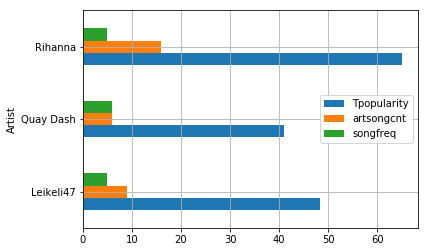

In [60]:
artfreqex = freqex_tracks.groupby('Artist')[['Tpopularity', 'artsongcnt', 'songfreq']].mean()
artfreqex.plot.barh(grid=True)

## GROUP B
#### PG13 x SONG REPEATS

In [65]:
pg_tracks = statipy_yr[statipy_yr['Explicit']==False]
freqpg_tracks = pg_tracks[pg_tracks['songfreq']>=3]
freqpg_tracks.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,yrsongcnt
43,Glamazon,False,57,RuPaul,Glamazon,2011,88,3,36
129,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014,88,3,47
132,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014,88,3,47
133,Glamazon,False,57,RuPaul,Glamazon,2011,88,3,36
157,"Shake, Rattle And Roll",False,51,Big Joe Turner,Shake Rattle & Rock,2007,4,3,41


In [68]:
## plots artists with most repeats && pg13 tracks
artfreqpg = freqpg_tracks.groupby('Artist')[['Tpopularity', 'artsongcnt', 'Explicit', 'songfreq']].mean()

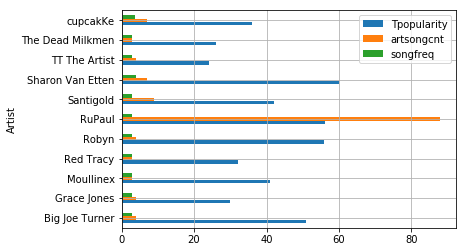

In [75]:
artfreqpg.plot.barh(grid=True)

## GROUP C
#### pg- highpop :: artist  mean (most pop)

In [102]:
pgpop_tracks = pg_tracks[pg_tracks['Tpopularity']>=43]
pg_art_info = pgpop_tracks.groupby(['Artist', 'artsongcnt'])[['Tpopularity']]
# artsongcnt reflects pg13 only songs by artist!

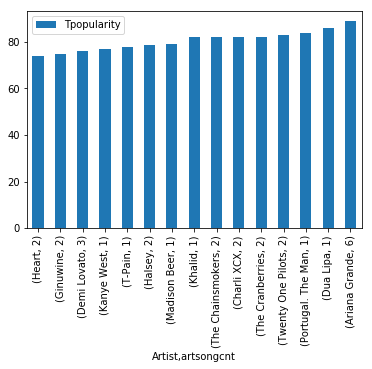

In [103]:
pg_art_info.mean().sort_values('Tpopularity').tail(15).plot.bar()

## GROUP D
#### art pg max cnt - statipy_yr >13.74 - 

In [82]:
statipy_yr['artsongcnt'].mean()

13.74268415741675

In [83]:
artmaxcnt = statipy_yr[statipy_yr['artsongcnt']>=13.74]

In [111]:
artpgmaxcnt = artmaxcnt[artmaxcnt['Explicit']==0.0]
artpgmaxcnt.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,yrsongcnt
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014,88,2,47
10,DRAG UP YOUR LIFE,False,48,RuPaul,DRAG UP YOUR LIFE,2018,88,1,118
16,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,False,63,RuPaul,Kitty Girl (feat. The Cast of Rupaul's Drag Ra...,2018,88,2,118
43,Glamazon,False,57,RuPaul,Glamazon,2011,88,3,36
56,Category Is (feat. The Cast of Rupaul's Drag R...,False,56,RuPaul,Category Is (feat. The Cast of Rupaul's Drag R...,2018,88,1,118


In [109]:
artpg_df = artpgmaxcnt.groupby(['Artist'])[['Tpopularity']]

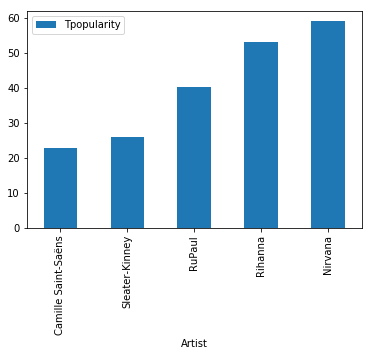

In [110]:
artpg_df.mean().sort_values('Tpopularity').plot.bar()

##### plots popularity artsongcnt over date explicit || artex_df

In [112]:
statipy_yr['artsongcnt'].mean()

13.74268415741675

In [113]:
artmaxcnt = statipy_yr[statipy_yr['artsongcnt']>=13.74]

In [135]:
artex_df = artmaxcnt[artmaxcnt['Explicit']<=0.0]
artex_set = artex_df.groupby(['Artist'])[['Tpopularity', 'songfreq']].mean()

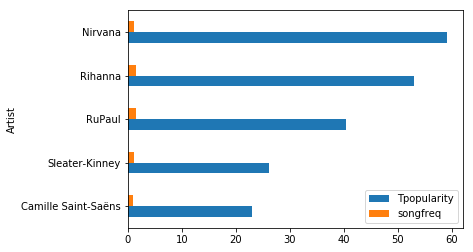

In [136]:
artex_set.sort_values('Tpopularity').plot.barh()

# 6. DATE II / YEAR
#### YEAR x old / new

*****************************

## GROUP A
#### (oldest dates)

In [142]:
old_tracks = statipy_yr.groupby(['Rdate', 'Artist'])[['Tpopularity', 'artsongcnt', 'yrsongcnt']].mean().head(15)

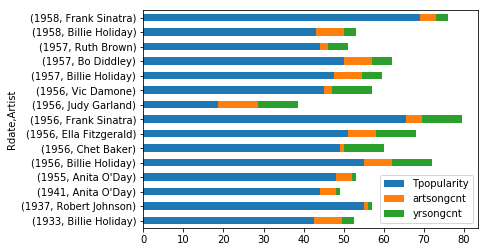

In [143]:
old_tracks.plot(kind='barh',stacked=True)

## GROUP B
#### (newest dates)

In [144]:
newest_tracks = statipy_yr.groupby(['Rdate', 'Artist'])[['Tpopularity', 'artsongcnt', 'yrsongcnt']].mean().tail(15)

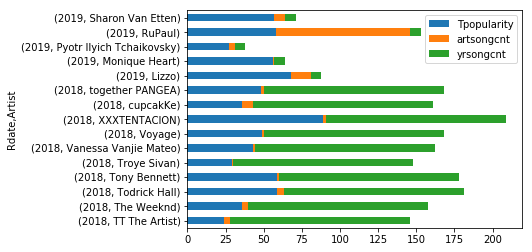

In [145]:
newest_tracks.plot(kind='barh',stacked=True)

# 7. ARTIST II
*****************************

In [170]:
artistdf1 = statipy_yr.groupby(['Artist', 'Rdate'])[['Tpopularity', 'artsongcnt', 'songfreq', 'Explicit']].mean()
artistdf1.head()

,,Tpopularity,artsongcnt,songfreq,Explicit
Artist,Rdate,,,,
!!!,2017,38.0,2.0,2.0,0.0
2Pac,2014,43.0,1.0,1.0,1.0
Aaron Copland,1960,50.0,1.0,1.0,0.0
Adam Joseph,2017,40.0,1.0,1.0,0.0
Adore Delano,2014,49.0,1.0,1.0,1.0


In [150]:
artmaxcnt1 = artistdf1[artistdf1['artsongcnt']>=5]
artnonr = artmaxcnt1[artmaxcnt1['songfreq']<=1.50]
artrepeats = artmaxcnt1[artmaxcnt1['songfreq']>=1.50]

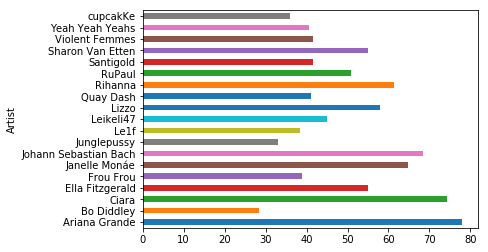

In [171]:
artrepeats.groupby('Artist')['Tpopularity'].mean().plot.barh(stacked=True)

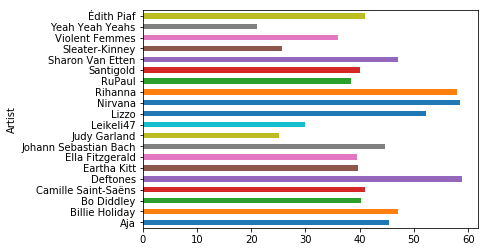

In [172]:
artnonr.groupby(['Artist'])['Tpopularity'].mean().plot.barh(stacked=True)

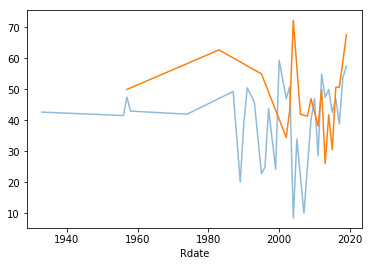

In [180]:
artnonr.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.50)
artrepeats.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True)

In [ ]:
## plots artists with more than 5 tracks album stats over dates

In [191]:
artmaxcnt1[['Tpopularity']].mean()

Tpopularity    43.939947
dtype: float64

In [194]:
highpop_artmax = artmaxcnt1[artmaxcnt1['Tpopularity']>=43.93]

In [195]:
highpop_artmax

Tpopularity  artsongcnt  songfreq  Explicit
Artist                Rdate                                             
Aja                   2017     48.000000         5.0  1.000000  0.500000
Ariana Grande         2018     77.833333         6.0  1.666667  0.833333
Billie Holiday        1956     55.000000         7.0  1.000000  0.000000
                      1957     47.500000         7.0  1.000000  0.000000
Bo Diddley            1957     50.000000         7.0  2.000000  0.000000
Camille Saint-Saëns   2015     62.000000        15.0  1.000000  0.000000
Ciara                 2004     72.333333         5.0  1.666667  0.000000
                      2018     76.000000         5.0  2.000000  0.000000
Deftones              1997     64.000000         8.0  1.000000  0.000000
                      2000     59.400000         8.0  1.000000  0.000000
                      2010     53.000000         8.0  1.000000  0.000000
Eartha Kitt           2003     51.000000         6.0  1.000000  0.000000
Ella Fitzgerald       1956     51.000000         7.0  1.000000  0.000000
                      1995     55.000000         7.0  2.000000  0.000000
                      2014     50.000000         7.0  1.000000  0.000000
                      2017     52.000000         7.0  1.000000  0.000000
Janelle Monáe         2018     64.833333         6.0  1.666667  1.000000
Johann Sebastian Bach 1983     68.500000         6.0  2.000000  0.000000
                      2002     47.000000         6.0  1.000000  0.000000
                      2013     58.000000         6.0  1.000000  0.000000
Le1f                  2014     45.000000         6.0  2.000000  1.000000
Leikeli47             2016     46.000000         9.0  5.000000  1.000000
                      2017     44.000000         9.0  2.000000  1.000000
Lizzo                 2016     54.000000        13.0  1.000000  1.000000
                      2017     63.000000        13.0  2.000000  0.000000
                      2018     61.000000        13.0  1.000000  0.000000
                      2019     67.666667        13.0  1.666667  1.000000
Nirvana               1991     65.000000        15.0  1.333333  0.000000
                      1993     57.000000        15.0  1.000000  0.000000
                      2009     53.600000        15.0  1.000000  0.000000
Rihanna               2010     61.000000        16.0  1.000000  1.000000
                      2011     59.500000        16.0  2.000000  0.500000
                      2012     55.000000        16.0  1.000000  0.000000
                      2016     63.222222        16.0  3.444444  1.000000
RuPaul                2011     55.000000        88.0  2.666667  0.000000
                      2012     50.000000        88.0  2.000000  0.000000
                      2014     48.500000        88.0  1.857143  0.000000
                      2018     57.500000        88.0  1.500000  0.000000
                      2019     58.000000        88.0  1.000000  0.000000
Sharon Van Etten      2017     55.000000         7.0  3.400000  0.000000
                      2019     57.000000         7.0  1.000000  0.000000
Violent Femmes        1983     57.000000        10.0  2.714286  0.571429
Yeah Yeah Yeahs       2009     47.000000        11.0  1.666667  0.000000
Édith Piaf            1987     49.333333         8.0  1.000000  0.000000

In [ ]:
#- plots artist with most frequent songs with no repeats high popularity over dates

In [196]:
highpop_artmax1nr = highpop_artmax[highpop_artmax['songfreq']<=1.0]

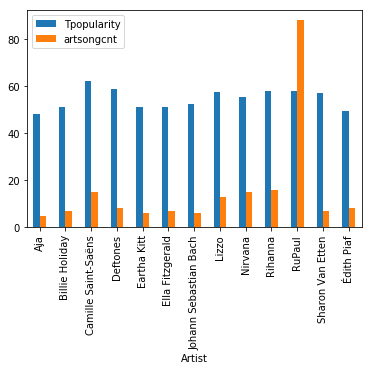

In [207]:
highpop_artmax1nr.groupby('Artist')[['Tpopularity', 'artsongcnt']].mean().plot.bar()

In [198]:
highpop_artmax2r = highpop_artmax[highpop_artmax['songfreq']>=1.5]

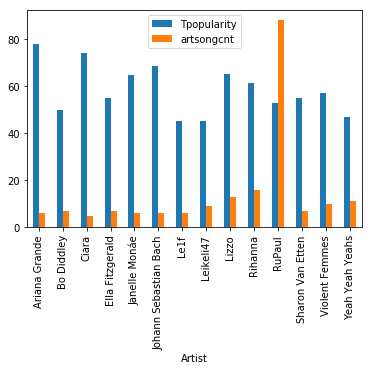

In [211]:
highpop_artmax2r.groupby('Artist')[['Tpopularity', 'artsongcnt']].mean().plot.bar()

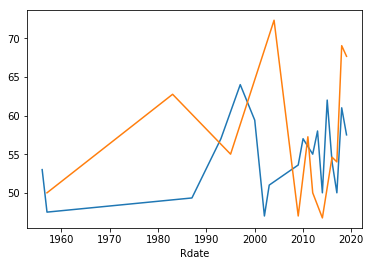

In [214]:
highpop_artmax1nr.groupby(['Rdate'])['Tpopularity'].mean().plot()
highpop_artmax2r.groupby(['Rdate'])['Tpopularity'].mean().plot()

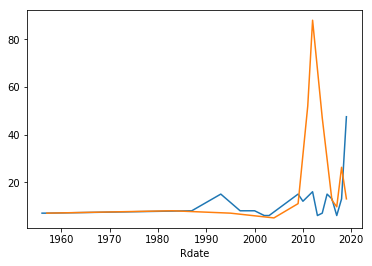

In [216]:
highpop_artmax1nr.groupby(['Rdate'])['artsongcnt'].mean().plot()
highpop_artmax2r.groupby(['Rdate'])['artsongcnt'].mean().plot()

In [225]:
highfrequnion = highpop_artmax1nr[(highpop_artmax1nr['Tpopularity'] > 55) & (highpop_artmax1nr['artsongcnt'] < 80) ]

In [226]:
highfrequnion

Tpopularity  artsongcnt  songfreq  Explicit
Artist                Rdate                                             
Camille Saint-Saëns   2015          62.0        15.0       1.0       0.0
Deftones              1997          64.0         8.0       1.0       0.0
                      2000          59.4         8.0       1.0       0.0
Johann Sebastian Bach 2013          58.0         6.0       1.0       0.0
Lizzo                 2018          61.0        13.0       1.0       0.0
Nirvana               1993          57.0        15.0       1.0       0.0
Rihanna               2010          61.0        16.0       1.0       1.0
Sharon Van Etten      2019          57.0         7.0       1.0       0.0

In [228]:
highrepeatfrequnion = highpop_artmax2r[(highpop_artmax2r['Tpopularity'] > 55) & (highpop_artmax2r['artsongcnt'] < 80) ]

In [229]:
highrepeatfrequnion

Tpopularity  artsongcnt  songfreq  Explicit
Artist                Rdate                                             
Ariana Grande         2018     77.833333         6.0  1.666667  0.833333
Ciara                 2004     72.333333         5.0  1.666667  0.000000
                      2018     76.000000         5.0  2.000000  0.000000
Janelle Monáe         2018     64.833333         6.0  1.666667  1.000000
Johann Sebastian Bach 1983     68.500000         6.0  2.000000  0.000000
Lizzo                 2017     63.000000        13.0  2.000000  0.000000
                      2019     67.666667        13.0  1.666667  1.000000
Rihanna               2011     59.500000        16.0  2.000000  0.500000
                      2016     63.222222        16.0  3.444444  1.000000
Violent Femmes        1983     57.000000        10.0  2.714286  0.571429

In [250]:
mergehigh = pd.merge(highpop_artmax1nr, highpop_artmax2r, on=['Artist'], how='inner')
mergehigh.groupby('Artist')[['Tpopularity_x']].mean()

,Tpopularity_x
Artist,
Ella Fitzgerald,51.0
Johann Sebastian Bach,52.5
Lizzo,57.5
Rihanna,58.0
RuPaul,58.0
Sharon Van Etten,57.0


# 8.
*****************************